In [1]:
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [36]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [37]:
train_df = pd.read_csv('train.csv', index_col = 0)
test_df = pd.read_csv('test.csv', index_col = 0)

In [38]:
train_df.head()

,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
Id,,,,,,,,,,,,,
0,For some reason everybody complains and I'm complaining now about my toilet that I just boughtFor some reason it's not ceiling from the tank to the pedestal I can't get it sealed without cracking ...,0,0,0,0,0,0,0,0,0,0,1,0
1,"I like everything about it, great choice of spray patterns, it puts out a large volume of water out of my 1"" pipes",0,0,0,0,1,1,0,0,0,0,0,1
2,Excellent ceiling fan brace. Easy to install and well made,0,0,0,0,0,0,1,0,0,1,0,1
3,Work great easy to use . No issues at all with hanging fan,0,0,0,0,0,1,0,0,0,0,1,1
4,"I would recommend this product because it is perfect for watering hanging baskets, the wand has a shut off vale on it to be able to shut off as you move from one plant to another.See more",0,0,0,0,0,0,0,0,0,1,0,1


In [39]:
test_df.head()

,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
Id,,,,,,,,,,,,,
0,Made of very thin cheap metal broke on very first crimp.Had to rush to local hardware store spend 60 more on another because water was shut off in my home.Did not return because using case for the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"As good as the brand names, no jams or misfires on my Paslode fuel cell nailer or on my Banks (HF) nailer.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"unit was easy to use, with understandable in structions.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I am the new family plumber. Works well. No problems changing out valves in the rental houses.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Seems to be holding up well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(train_df.shape)
print(test_df.shape)

(6136, 13)
(2631, 13)


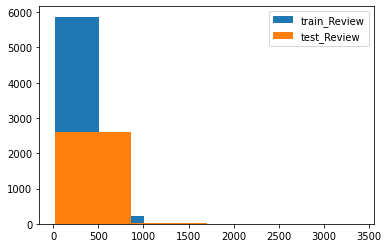

In [41]:
length_train = train_df['Review'].str.len()
length_test = test_df['Review'].str.len()

plt.hist(length_train, bins=4, label="train_Review")
plt.hist(length_test, bins=4, label="test_Review")
plt.legend()
plt.show()

In [42]:
for i in train_df.columns:
  print(i)
  print(train_df[i].value_counts())

Review
So far so good! They're light weight and slightly thin, but plenty of padding for an average adult or younger. We don't keep ours out in the elements and they seem to wick water and dry fast when they do get wet. Showing no signs of fading so far, but it's still early. Would purchase again. Exactly what we needed for the price.                                                                                                                   1
The mesh is a bit larger than what I am use to seeing in screen material. But, better than a big rip, so it did the job.                                                                                                                                                                                                                                                                                                                                    1
Worked great looks good                                                                              

In [43]:
combi = train_df.append(test_df, ignore_index=True)
combi.shape

(8767, 13)

In [44]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [45]:
combi['tidy_Review'] = np.vectorize(remove_pattern)(combi['Review'], "@[\w]*") 
combi['tidy_Review'] = combi['tidy_Review'].str.replace("[^a-zA-Z#]", " ")
combi['tidy_Review'] = combi['tidy_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [46]:
tokenized_Review = combi['Review'].apply(lambda x: x.split()) # tokenizing

In [47]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_Review = tokenized_Review.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [48]:
for i in range(len(tokenized_Review)):
    tokenized_Review[i] = ' '.join(tokenized_Review[i])
    
combi['tidy_Review'] = tokenized_Review

In [49]:
combi

,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity,tidy_Review
0,For some reason everybody complains and I'm complaining now about my toilet that I just boughtFor some reason it's not ceiling from the tank to the pedestal I can't get it sealed without cracking ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,for some reason everybodi complain and i'm complain now about my toilet that I just boughtfor some reason it' not ceil from the tank to the pedest I can't get it seal without crack the toilet supp...
1,"I like everything about it, great choice of spray patterns, it puts out a large volume of water out of my 1"" pipes",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"I like everyth about it, great choic of spray patterns, it put out a larg volum of water out of my 1"" pipe"
2,Excellent ceiling fan brace. Easy to install and well made,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,excel ceil fan brace. easi to instal and well made
3,Work great easy to use . No issues at all with hanging fan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,work great easi to use . No issu at all with hang fan
4,"I would recommend this product because it is perfect for watering hanging baskets, the wand has a shut off vale on it to be able to shut off as you move from one plant to another.See more",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"I would recommend thi product becaus it is perfect for water hang baskets, the wand ha a shut off vale on it to be abl to shut off as you move from one plant to another.se more"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762,Very strong piece of hardware. Easy to adjust and install. I really recommended if you need to upgrade your ceiling light feature in order to install a ceiling light and fan.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,veri strong piec of hardware. easi to adjust and install. I realli recommend if you need to upgrad your ceil light featur in order to instal a ceil light and fan.
8763,Great supot. Square Wich is better to line up the the round one at the blue store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,great supot. squar wich is better to line up the the round one at the blue store
8764,"No jams, no problems. Good quality nail!",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No jams, no problems. good qualiti nail!"
8765,"Chair cushion is and very firm, however nice red color; would only recommend for decoration only.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"chair cushion is and veri firm, howev nice red color; would onli recommend for decor only."


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [51]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_Review'])
bow.shape

(8767, 1000)

In [52]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_Review'])
tfidf.shape

(8767, 1000)

In [53]:
tokenized_tweet = combi['tidy_Review'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_Review']), epochs=20)

(3761759, 5281460)

In [54]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [55]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(8767, 200)

In [56]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [57]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["Review_" + str(i)]))
    return output

In [58]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [59]:
labeled_tweets[:6]

[LabeledSentence(words=['for', 'some', 'reason', 'everybodi', 'complain', 'and', "i'm", 'complain', 'now', 'about', 'my', 'toilet', 'that', 'I', 'just', 'boughtfor', 'some', 'reason', "it'", 'not', 'ceil', 'from', 'the', 'tank', 'to', 'the', 'pedest', 'I', "can't", 'get', 'it', 'seal', 'without', 'crack', 'the', 'toilet', 'support', 'design', 'for', 'some', 'reason', "i'm", 'veri', 'unhappi', 'with', 'hi', 'toilet', 'never', 'buy', 'american', 'standard', 'again'], tags=['Review_0']),
 LabeledSentence(words=['I', 'like', 'everyth', 'about', 'it,', 'great', 'choic', 'of', 'spray', 'patterns,', 'it', 'put', 'out', 'a', 'larg', 'volum', 'of', 'water', 'out', 'of', 'my', '1"', 'pipe'], tags=['Review_1']),
 LabeledSentence(words=['excel', 'ceil', 'fan', 'brace.', 'easi', 'to', 'instal', 'and', 'well', 'made'], tags=['Review_2']),
 LabeledSentence(words=['work', 'great', 'easi', 'to', 'use', '.', 'No', 'issu', 'at', 'all', 'with', 'hang', 'fan'], tags=['Review_3']),
 LabeledSentence(words=['

In [60]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 8767/8767 [00:00<00:00, 1179252.88it/s]


In [61]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_Review']), epochs=15)

In [62]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(8767, 200)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [64]:
train_bow = bow[:6136,:]
test_bow = bow[6136:,:]



In [72]:
bow

<8767x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 98535 stored elements in Compressed Sparse Row format>

In [66]:
train_df.columns

Index(['Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [73]:
from math import e
for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)
    lreg = LogisticRegression()
    lreg.fit(xtrain_bow, ytrain) # training the model

    prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
    prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
    prediction_int = prediction_int.astype(np.int)

    print(i, f1_score(yvalid, prediction_int)) # calculating f1 score

    test_pred = lreg.predict_proba(test_bow)
    test_pred_int = test_pred[:,1] >= 0.3
    test_pred_int = test_pred_int.astype(np.int)
    test_df[i] = test_pred_int

Components 0.3522012578616352
Delivery and Customer Support 0.4470588235294118
Design and Aesthetics 0.6436170212765957
Dimensions 0.6534216335540839
Features 0.42603550295857984
Functionality 0.8063337393422655
Installation 0.7685589519650655
Material 0.4
Price 0.8305084745762712
Quality 0.7790432801822323
Usability 0.7579529737206085
Polarity 0.9115782449115782


In [74]:
test_df.head()

,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
Id,,,,,,,,,,,,,
0,Made of very thin cheap metal broke on very first crimp.Had to rush to local hardware store spend 60 more on another because water was shut off in my home.Did not return because using case for the...,1,0,0,0,0,0,0,0,0,0,0,0
1,"As good as the brand names, no jams or misfires on my Paslode fuel cell nailer or on my Banks (HF) nailer.",0,0,0,0,0,1,0,0,0,0,0,1
2,"unit was easy to use, with understandable in structions.",0,0,0,0,0,0,0,0,0,0,1,1
3,I am the new family plumber. Works well. No problems changing out valves in the rental houses.,0,0,0,0,0,1,0,0,0,0,0,1
4,Seems to be holding up well.,0,0,0,0,0,1,0,0,0,0,0,1


In [80]:
test_df.columns

Index(['Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [81]:
LogisticRegression_df = test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]

In [84]:
LogisticRegression_df.to_csv('LogisticRegression_df.csv', index = False)

In [85]:
train_tfidf = tfidf[:6136,:]
test_tfidf = tfidf[6136:,:]

In [86]:
from math import e
for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)

    xtrain_tfidf = train_tfidf[ytrain.index]
    xvalid_tfidf = train_tfidf[yvalid.index]
    
    lreg.fit(xtrain_tfidf, ytrain)

    prediction = lreg.predict_proba(xvalid_tfidf)
    prediction_int = prediction[:,1] >= 0.3
    prediction_int = prediction_int.astype(np.int)

    print(i,f1_score(yvalid, prediction_int))
    test_pred = lreg.predict_proba(test_bow)
    test_pred_int = test_pred[:,1] >= 0.3
    test_pred_int = test_pred_int.astype(np.int)
    test_df[i] = test_pred_int

TFIDF_df = test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]

Components 0.16494845360824742
Delivery and Customer Support 0.17543859649122806
Design and Aesthetics 0.6097560975609756
Dimensions 0.680628272251309
Features 0.2
Functionality 0.8210405946255004
Installation 0.7428571428571428
Material 0.25925925925925924
Price 0.8219178082191781
Quality 0.7720536344389555
Usability 0.7514619883040935
Polarity 0.8919089759797725


In [87]:
TFIDF_df.to_csv('TFIDF.csv', index = False)

In [90]:
train_d2v = docvec_df.iloc[:6136,:]
test_d2v = docvec_df.iloc[6136:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)

    xtrain_d2v = train_d2v.iloc[ytrain.index,:]
    xvalid_d2v = train_d2v.iloc[yvalid.index,:]


    lreg.fit(xtrain_d2v, ytrain)

    prediction = lreg.predict_proba(xvalid_d2v)
    prediction_int = prediction[:,1] >= 0.3
    prediction_int = prediction_int.astype(np.int)
    print(i,f1_score(yvalid, prediction_int))
    test_pred = lreg.predict_proba(test_bow)
    test_pred_int = test_pred[:,1] >= 0.3
    test_pred_int = test_pred_int.astype(np.int)
    test_df[i] = test_pred_int

Word2Vec_df = test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]

Components 0.2043795620437956


ValueError: ignored

In [92]:
from sklearn import svm


for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)
    svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
    prediction = svc.predict_proba(xvalid_bow)
    prediction_int = prediction[:,1] >= 0.3
    prediction_int = prediction_int.astype(np.int)
    print(i,f1_score(yvalid, prediction_int))

    test_pred = svc.predict_proba(test_bow)
    test_pred_int = test_pred[:,1] >= 0.3
    test_pred_int = test_pred_int.astype(np.int)
    test_df[i] = test_pred_int



Components 0.23008849557522124
Delivery and Customer Support 0.4819277108433735
Design and Aesthetics 0.6253521126760564
Dimensions 0.6697674418604651
Features 0.14285714285714288
Functionality 0.7872093023255814
Installation 0.7538126361655773
Material 0.3466666666666666
Price 0.8126315789473685
Quality 0.763878608438194
Usability 0.7270233196159123
Polarity 0.9020752269779506


In [93]:
SVM_df = test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]

In [95]:
SVM_df.to_csv('svm.csv', index = False)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)

    rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

    prediction = rf.predict(xvalid_bow)
    f1_score(yvalid, prediction)
    test_pred = rf.predict(test_bow)
    test_df[i] = test_pred

In [99]:
RandomForest = test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]
RandomForest.to_csv('RandomForest.csv', index = False)

In [ ]:
for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)
    rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

    prediction = rf.predict(xvalid_tfidf)
    print(i,f1_score(yvalid, prediction))
    

In [101]:
from xgboost import XGBClassifier

for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)
    xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
    prediction = xgb_model.predict(xvalid_bow)
    print(i,f1_score(yvalid, prediction))
    test_pred = xgb_model.predict(test_bow)
    test_df[i] = test_pred

Components 0.328125
Delivery and Customer Support 0.32098765432098764
Design and Aesthetics 0.6306818181818182
Dimensions 0.663594470046083
Features 0.33557046979865773
Functionality 0.8207485226526593
Installation 0.8186046511627907
Material 0.3703703703703704
Price 0.8369098712446351
Quality 0.8122481869460113
Usability 0.7787878787878788
Polarity 0.9196428571428571


In [102]:
XGB_classifier =  test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]
XGB_classifier.to_csv('XGB_classifier.csv', index = False)

In [103]:

for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)
    xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
    prediction = xgb.predict(xvalid_bow)
    print(i,f1_score(yvalid, prediction))
    test_pred = xgb.predict(test_bow)
    test_df[i] = test_pred

XGB_classifier_tfidf =  test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]
XGB_classifier_tfidf.to_csv('XGB_classifier_tfidf.csv', index = False)

Components 0.30075187969924805
Delivery and Customer Support 0.396039603960396
Design and Aesthetics 0.6293333333333334
Dimensions 0.6144329896907216
Features 0.34444444444444444
Functionality 0.806679511881824
Installation 0.7885010266940451
Material 0.40350877192982454
Price 0.7225130890052356
Quality 0.7974068071312803
Usability 0.6597938144329897
Polarity 0.90794283815221


In [106]:

for i in train_df.columns:
  if i == 'Review':
    pass
  else:
    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df[i],  
                                                          random_state=42, 
                                                          test_size=0.3)
    xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
    prediction = xgb.predict(xvalid_w2v)
    f1_score(yvalid, prediction)
    print(i,f1_score(yvalid, prediction))
    test_pred = xgb.predict(test_w2v)
    test_df[i] = test_pred

XGB_classifier_w2w =  test_df[['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']]
XGB_classifier_w2w.to_csv('XGB_classifier_w2v.csv', index = False)

Components 0.13186813186813187
Delivery and Customer Support 0.3582089552238805
Design and Aesthetics 0.4291187739463601
Dimensions 0.5317220543806647
Features 0.07407407407407407
Functionality 0.762734584450402
Installation 0.6239554317548747
Material 0.15999999999999998
Price 0.663129973474801
Quality 0.6817391304347825
Usability 0.6058394160583942
Polarity 0.9185287040220007


In [ ]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [ ]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

In [ ]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]